# 다중 분류(Multiclass Classification)
### 이미지 분류(**합성곱 신경망 CNN**)
---
- 데이터 셋: fashion_mnist
  - 흑백 이미지: 28, 28, 1

### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비
**Labels**

|Label|Description|
|:---:|:---:|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 이미지, 라벨 시각화

In [3]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
samples = np.random.randint(60000, size=9)
samples

array([39040, 59165, 18480, 54138,  6404, 33775, 15367,  5709, 22770])

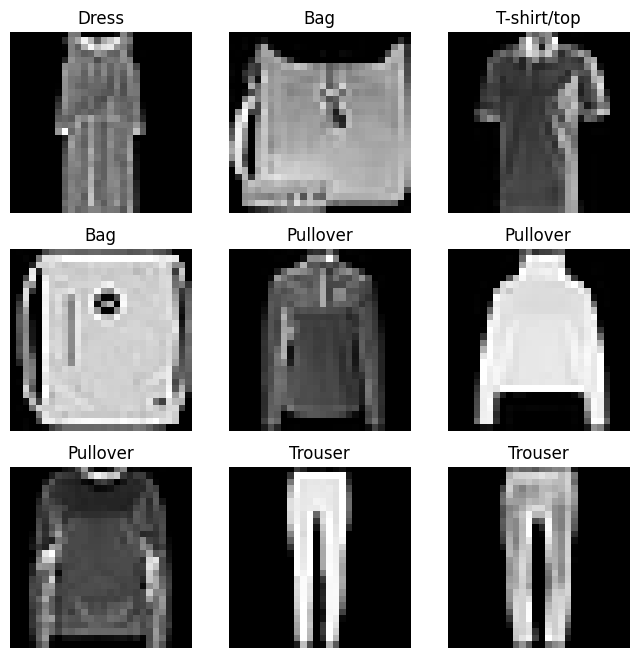

In [5]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.show()

- 데이터 분리: 학습 데이터, 검증 데이터

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=1234)

print(X_train.shape, X_val.shape) 
print(y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


- 정규화: 최소-최대 정규화(Min-Max Scaler)

In [7]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [8]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [9]:
y_train[:10]

array([5, 0, 6, 5, 4, 8, 6, 7, 4, 6], dtype=uint8)

- 원-핫 인코딩(One-Hot Encoding)

In [10]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [11]:
X_train.shape

(42000, 28, 28)

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
X_train.shape

(42000, 28, 28, 1)

### 모델링(Modeling)

In [14]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)), 
    layers.MaxPool2D(pool_size=(2, 2)), 

    layers.Conv2D(filters=64, kernel_size=3, activation='relu'), 
    layers.MaxPool2D(pool_size=(2, 2)), 

    layers.Flatten(), 
    layers.Dense(units=32, activation='relu'), 
    layers.Dense(units=10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

### 컴파일(Compile)

In [16]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['acc']
)

### 학습(Training)

In [17]:
%%time
EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(X_train, y_train_oh, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val_oh), 
                    verbose=1)

Epoch 1/50
1313/1313 [==============================] - 20s 5ms/step - loss: 0.5381 - acc: 0.8053 - val_loss: 0.4052 - val_acc: 0.8547
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3541 - acc: 0.8730 - val_loss: 0.3360 - val_acc: 0.8788
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3109 - acc: 0.8870 - val_loss: 0.3135 - val_acc: 0.8846
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2815 - acc: 0.8987 - val_loss: 0.2908 - val_acc: 0.8933
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2559 - acc: 0.9061 - val_loss: 0.2741 - val_acc: 0.9004
Epoch 6/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2349 - acc: 0.9136 - val_loss: 0.2720 - val_acc: 0.9021
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2162 - acc: 0.9210 - val_loss: 0.2835 - val_acc: 0.8974
Epoch 8/50
1313/1313 [==============================] - 7s 5m

- 학습 과정 시각화

In [18]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

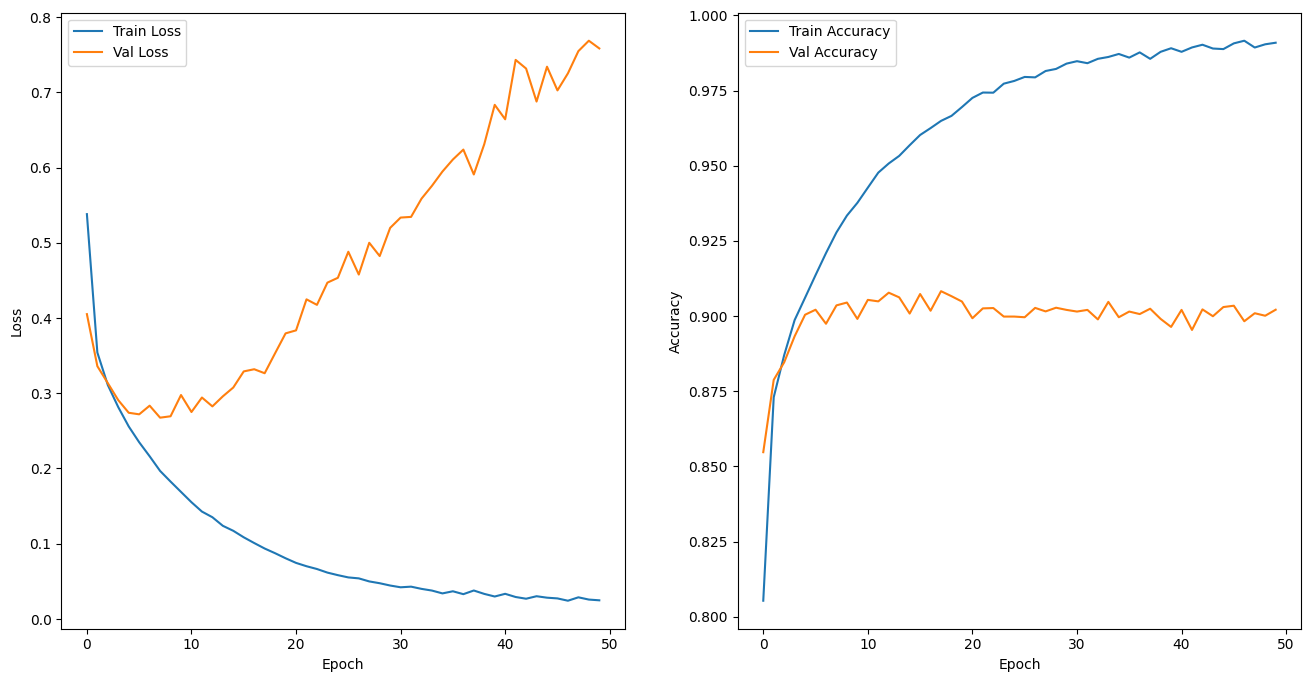

In [19]:
plot_history(history)

### 평가(Evaluation)

In [20]:
model.evaluate(X_train, y_train_oh)

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0143 - acc: 0.9950


[0.014331791549921036, 0.9950000047683716]

In [21]:
model.evaluate(X_test, y_test_oh)

313/313 [==============================] - 1s 3ms/step - loss: 0.7961 - acc: 0.9003


[0.7960572838783264, 0.9003000259399414]

### 예측(Prediction)

In [22]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.1152647e-23, 1.8513148e-34, 9.7010127e-26, 1.4085669e-27,
        2.0542680e-33, 1.2013809e-15, 1.5403040e-38, 5.1093176e-14,
        3.8611571e-16, 1.0000000e+00],
       [1.5527101e-16, 2.6512156e-36, 1.0000000e+00, 4.0115991e-24,
        1.2492882e-08, 1.1452645e-37, 1.5127862e-20, 3.1899945e-37,
        1.2117143e-29, 0.0000000e+00],
       [2.2459117e-32, 1.0000000e+00, 1.7516667e-34, 8.2437961e-26,
        2.2972153e-26, 8.8871684e-30, 2.2437498e-28, 0.0000000e+00,
        5.7051489e-34, 1.7532631e-28],
       [9.7625291e-33, 1.0000000e+00, 3.9009763e-34, 3.1761860e-31,
        1.3015405e-25, 1.8653187e-38, 1.4324605e-31, 0.0000000e+00,
        0.0000000e+00, 6.0148806e-35],
       [7.2608703e-01, 3.6469501e-13, 1.1231123e-05, 8.7016872e-08,
        8.7798364e-04, 7.2630554e-17, 2.7302361e-01, 1.1419070e-16,
        1.0035987e-14, 5.7883604e-17]], dtype=float32)

In [23]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5]

array([9, 2, 1, 1, 0])

- 혼동 행렬(confusion matrix)

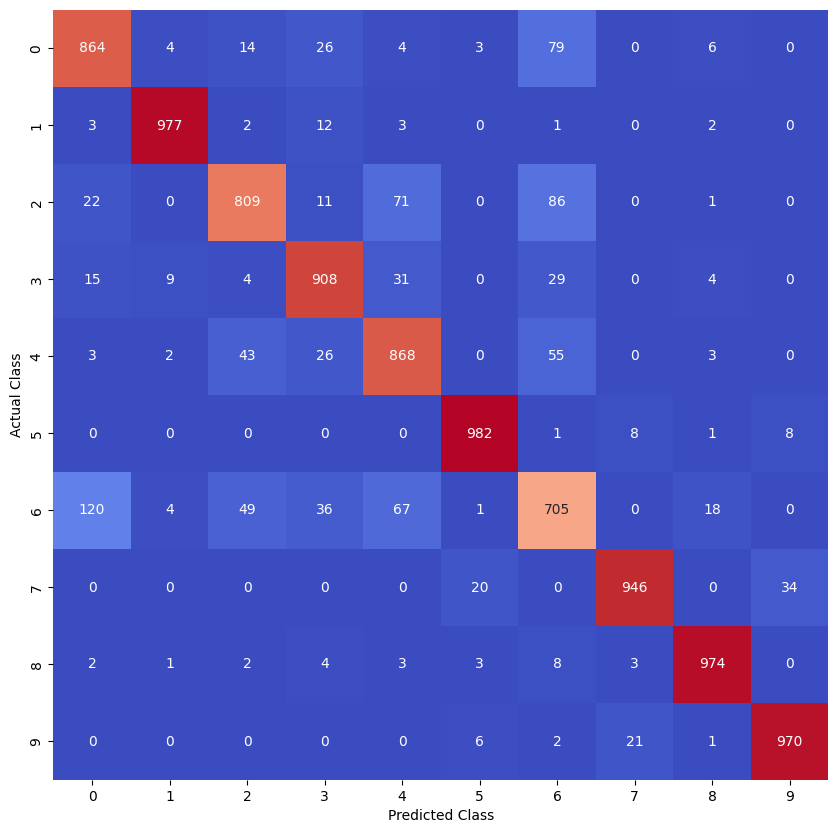

In [24]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cfm, annot=True, cbar=False, cmap='coolwarm', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

- 오답 이미지 시각화

In [25]:
samples = np.where((y_test==y_pred) == False)[0]
samples = np.random.choice(samples, 9)
samples

array([2840, 9791, 2811, 5070,  711, 3774, 4693, 5445, 2717])

In [26]:
X_test = X_test.reshape(-1, 28, 28)

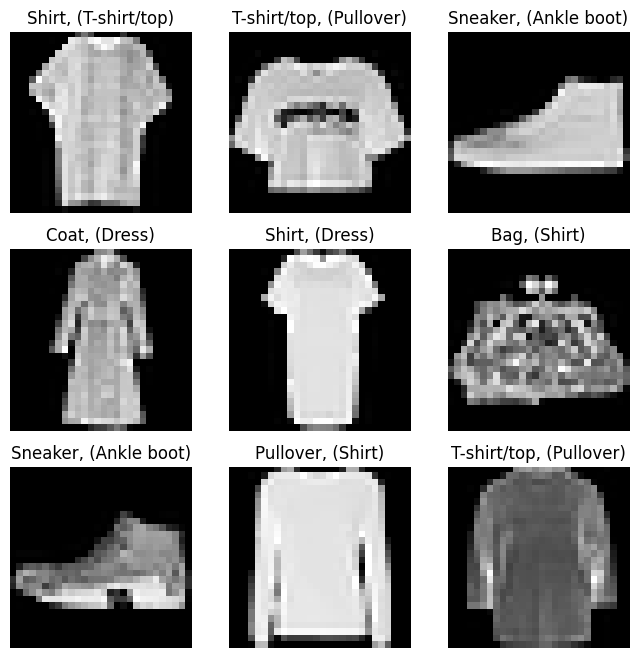

In [27]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()